In [6]:
import pandas as pd
df = pd.read_csv('CreditCardData.csv')
df = df.sample(n=10000, random_state=3)
print(df.shape)
df.head()

(10000, 16)


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
79528,#3176 177,14-Oct-20,Wednesday,7,Visa,PIN,30.0,ATM,Fashion,United Kingdom,United Kingdom,United Kingdom,M,48.8,Barlcays,0
53876,#3530 026,14-Oct-20,Wednesday,7,Visa,PIN,93.0,POS,Gaming,United Kingdom,United Kingdom,United Kingdom,F,44.6,Metro,0
9777,#2660 741,14-Oct-20,Wednesday,16,Visa,PIN,225.0,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,56.1,Halifax,0
6167,#3341 438,14-Oct-20,Wednesday,13,Visa,PIN,255.0,ATM,Gaming,United Kingdom,United Kingdom,United Kingdom,M,50.4,HSBC,0
22020,#2998 464,13-Oct-20,Tuesday,8,Visa,PIN,292.0,ATM,Fashion,United Kingdom,United Kingdom,United Kingdom,M,46.9,RBS,0


Data Understanding / Exploritory Data Analysis

Column Transaction ID dropped because of too many unique values (99.0%)


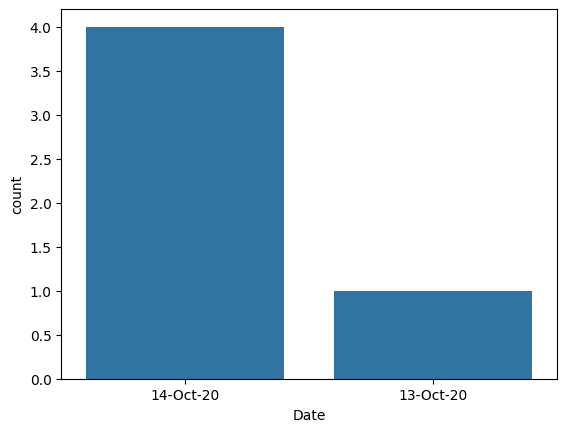

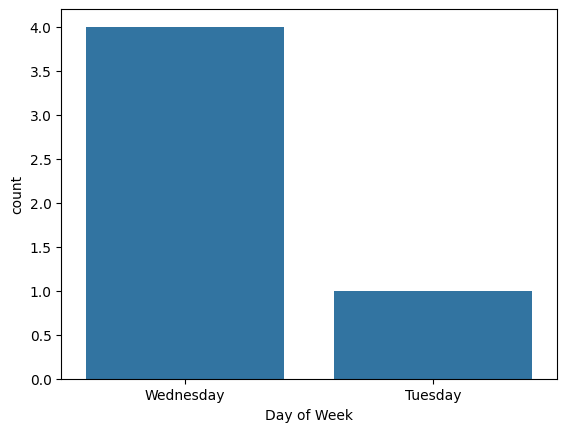

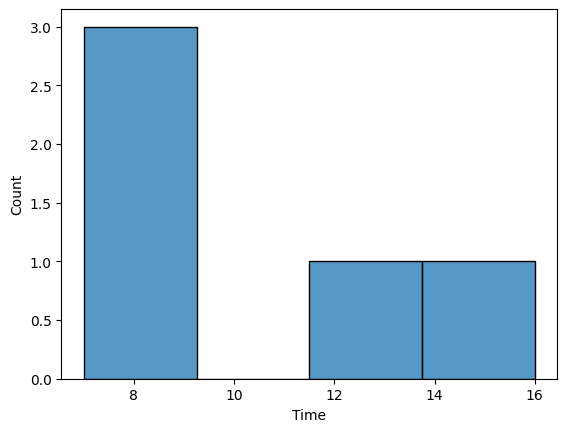

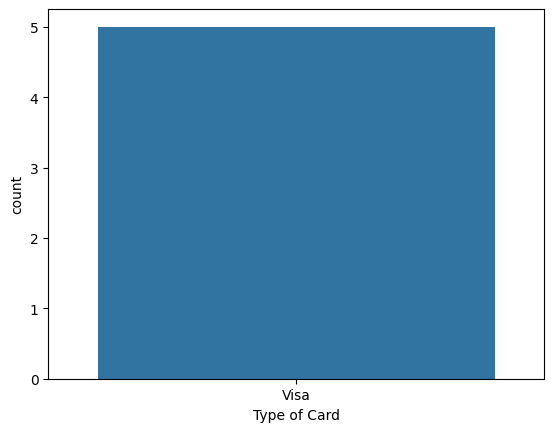

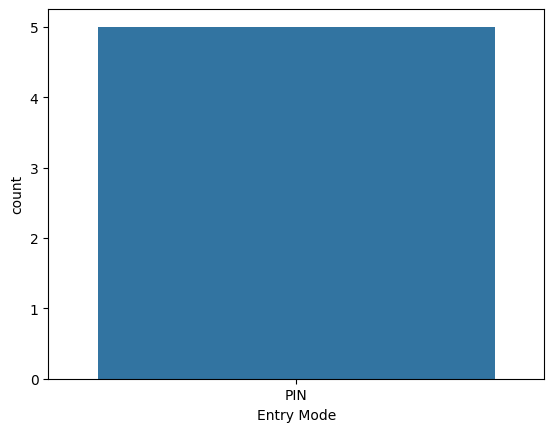

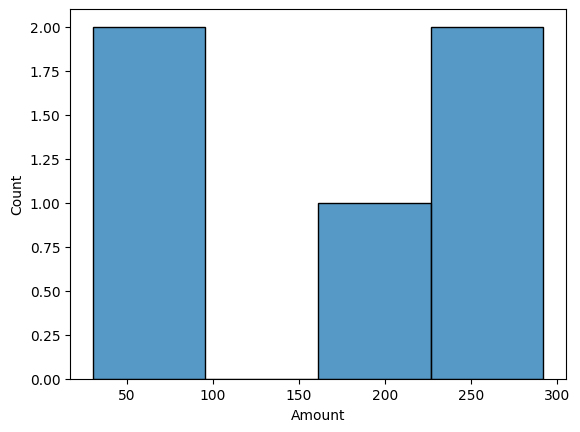

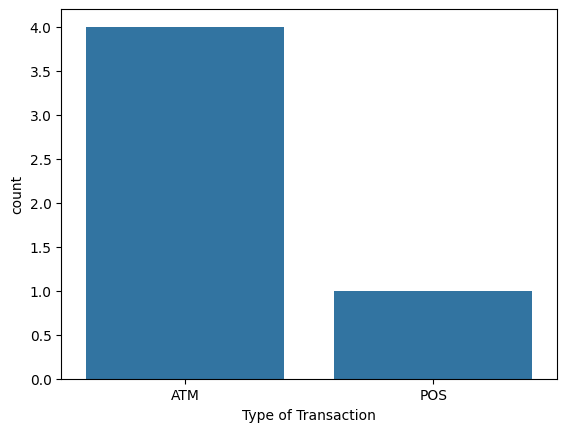

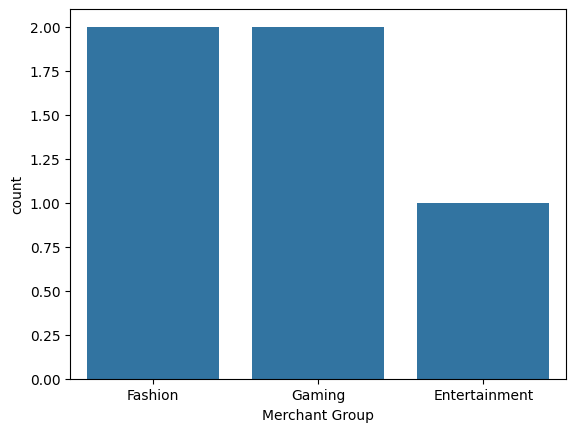

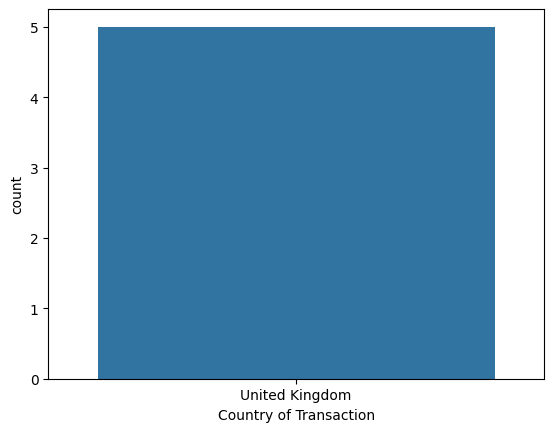

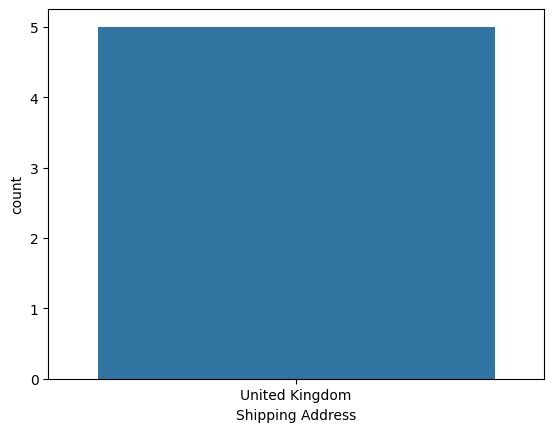

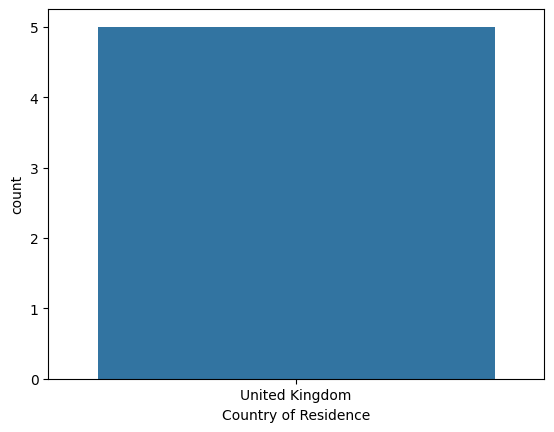

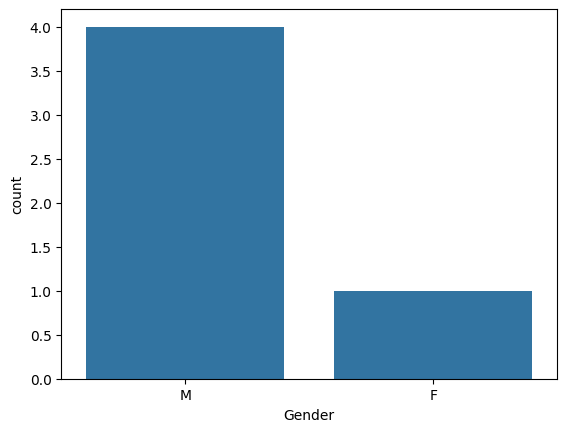

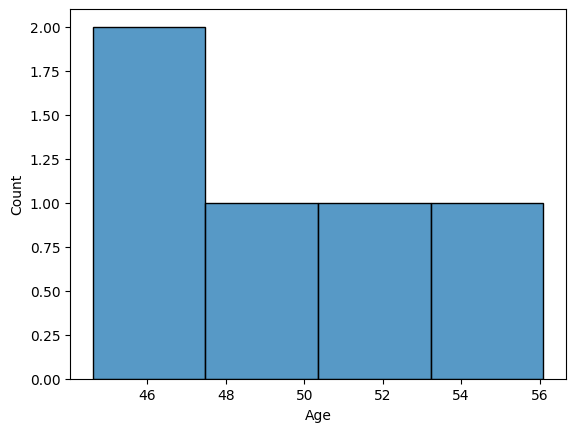

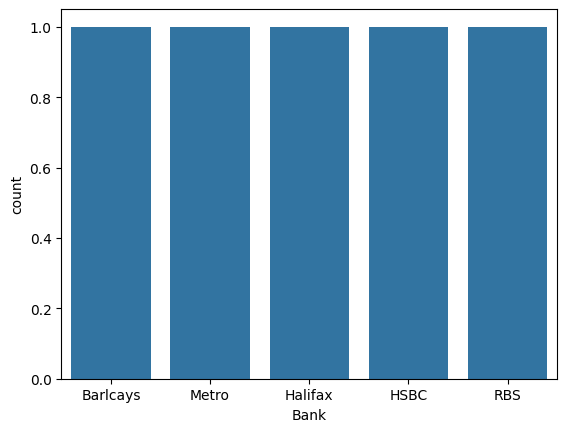

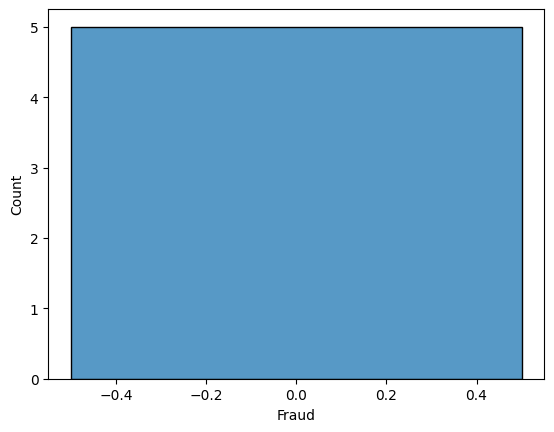

,type,missing,unique,min,q1,median,q3,max,mode,mean,std,skew,kurt
Date,categorical,0,2,-,-,-,-,-,14-Oct-20,-,-,-,-
Day of Week,categorical,0,2,-,-,-,-,-,Wednesday,-,-,-,-
Time,numeric,0,4,7,7.0,8.0,13.0,16,7,10.2,4.09,0.86,-1.61
Type of Card,categorical,0,1,-,-,-,-,-,Visa,-,-,-,-
Entry Mode,categorical,0,1,-,-,-,-,-,PIN,-,-,-,-
Amount,numeric,0,5,30.0,93.0,225.0,255.0,292.0,30.0,179.0,112.09,-0.58,-2.07
Type of Transaction,categorical,0,2,-,-,-,-,-,ATM,-,-,-,-
Merchant Group,categorical,0,3,-,-,-,-,-,Fashion,-,-,-,-
Country of Transaction,categorical,0,1,-,-,-,-,-,United Kingdom,-,-,-,-
Shipping Address,categorical,0,1,-,-,-,-,-,United Kingdom,-,-,-,-


In [2]:
# Univariate
import sys
sys.path.append('functions.py')
import functions as fun
df = fun.basic_wrangling(df)
fun.univariate(df)

In [3]:
# Bivariate
fun.bivariate(df, 'Fraud')

ModuleNotFoundError: No module named 'scipy'

Data Prep Cleaning

In [7]:
df.loc[df['Bank']=='Barlcays', 'Bank'] = 'Barclays'

Data Modeling

In [10]:
# Get X and y

from sklearn.tree import DecisionTreeClassifier

y = df.Fraud
X = df.drop(columns=['Fraud'])
X = pd.get_dummies(X, drop_first=True)
X.head()

ModuleNotFoundError: No module named 'sklearn'

In [9]:
model = DecisionTreeClassifier()
model.fit(X, y)

NameError: name 'DecisionTreeClassifier' is not defined

Model Evaluation

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, # This is the model we trained previously
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X.columns,
                class_names=['not fraud','fraud'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_tree.png') # Save the image file
Image(graph.create_png())     # This is like plt.show()

InvocationException: GraphViz's executables not found

In [ ]:
y_pred = model.predict(X)
pd.DataFrame({'Actual':y, 'Predicted':y_pred}).head(10)

,Actual,Predicted
79528,0,0
53876,0,0
9777,0,0
6167,0,0
22020,0,0


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  return cm


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

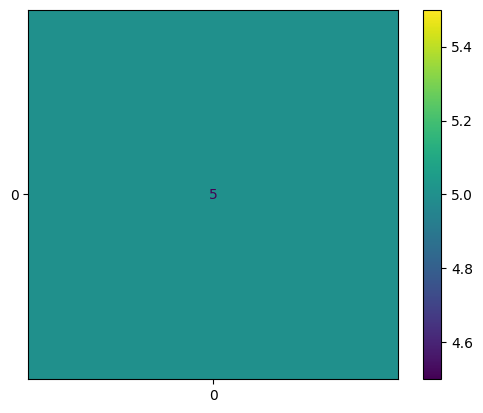

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['not fraud','fraud'])
cm_display.plot()
plt.show()

Deploy